In [1]:
import numpy as np
import pandas as pd

In [2]:
#use pandas to create 
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
tables[0].columns = tables[0].iloc[0]
df_table = tables[0]

#Dataframe will consist of three columns-Postal code,Borough and Neighborhood
df_table.columns = ['PostalCode', 'Borough', 'Neighborhood']
df_table = df_table.iloc[1:]

#ignoring not assigned boroughs
df_table = df_table[df_table.Borough!= 'Not assigned']

#If only a neighborhood is not assigned, then assign it equal to its borough
df_table.Neighborhood.replace('Not assigned', df_table.Borough, inplace=True)

#Combine neighborhoods with same postal codes in a single row and separate with commas(as_index = false to retain columns)
df_table = df_table.groupby(['PostalCode', 'Borough'], as_index=False).agg(lambda x: ','.join(x))
df_table.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [3]:
df_table.shape

(103, 3)

# Merge postcode coordinates with original data

In [4]:
df_geospace = pd.read_csv('http://cocl.us/Geospatial_data')
df_geospace.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df_final = pd.merge(df_table, df_geospace, on = 'PostalCode')
df_final.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [5]:
df_final['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

In [6]:
#Library to handle json files
import json

#Convert the adress to get latitude and longitude values
from geopy.geocoders import Nominatim

#Library to handle requests
import requests

#transfrom json file into pandas dataframe
from pandas.io.json import json_normalize

#Matplotlib and associated modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import kmeans for clustering
from sklearn.cluster import KMeans



In [7]:
#using geopy library for latitude and longitude values of address
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent = "toronto_explorar")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinates of Toronto are {}, {}".format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347


In [11]:
!conda install -c conda-forge folium 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.1-py_0        conda-forge
    folium:          

In [13]:
import folium

#creating map using folium
map_toronto = folium.Map(location = [latitude, longitude], zoom_start=10)

#add markers to map
for lat, lng, borough, neighborhood in zip(df_final['Latitude'], df_final['Longitude'], df_final['Borough'], df_final['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
              [lat, lng],
              radius = 5,
              popup = label,
              color='blue',
              fill=True,
              fill_color='#3186cc',
              fill_opacity=0.7,
              parse_html=False).add_to(map_toronto)

map_toronto

In [12]:
df_toronto_boroughs = df_final[df_final['Borough'].str.contains('Toronto')].reset_index(drop=True)
df_toronto_boroughs.head(20)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [14]:
map_toronto2 = folium.Map(location=[latitude,longitude], zoom_start=10)

for lat,lng,label in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto2)
    
map_toronto2

# Using Foursquare to explore

In [15]:
CLIENT_ID = 'Y1L1Q1OW1ETUUBUJRFDCKJPKSDVFEJICAGRY244N0C2QPSFZ'
CLIENT_SECRET = '1IFQNKYGYHQMXYM2FCXHJHE2UI2WWKBUWTI10LKA0DDSYLLB'
VERSION = '20180323'

In [16]:
df_toronto_boroughs.loc[0, 'Neighborhood']

neighborhood_latitude = df_toronto_boroughs.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto_boroughs.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto_boroughs.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [17]:
#Get top 100 venues in the radius of 500 meters
LIMIT = 100

radius = 500

#create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f25640ec8e3474a3967cb11'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'contact': {},
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.293942087809

In [18]:
#function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
            

In [19]:
# Clean the data and structure it as a dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
toronto_venues = getNearbyVenues(names = df_toronto_boroughs['Neighborhood'],
                                 latitudes = df_toronto_boroughs['Latitude'],
                                 longitudes = df_toronto_boroughs['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [22]:
toronto_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


In [23]:
#how many venues were returned for each neighborhood
toronto_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,57,57,57,57,57,57
"Brockton, Parkdale Village, Exhibition Place",25,25,25,25,25,25
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",19,19,19,19,19,19
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,63,63,63,63,63,63
Christie,17,17,17,17,17,17
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [24]:
#Unique categories amongst the venues
print("There are {} unique categories".format(len(toronto_venues['Venue Category'].unique())))

There are 233 unique categories


# Analyzing each neighborhood

In [25]:
#One hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

#Add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

#Neighborhood should be the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#Checking the size of columns
toronto_onehot.shape

(1634, 233)

In [26]:
toronto_grouped = toronto_onehot.groupby(['Neighborhood']).mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Business reply mail Processing Centre, South C...",0.052632,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.066667,0.066667,0.133333,0.2,0.133333,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Central Bay Street,0.015873,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.015873,0.000000,0.000000,0.015873,0.000000,0.00
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Church and Wellesley,0.026667,0.013333,0.000000,0.000000,0.000000,0.0,0.000000,0.013333,0.000000,...,0.013333,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.030303,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [27]:
toronto_grouped.shape

(39, 233)

In [28]:
toronto_ind=toronto_grouped[['Neighborhood', 'Indian Restaurant']]
toronto_ind.set_index(['Neighborhood'], inplace=True)
toronto_ind

,Indian Restaurant
Neighborhood,
Berczy Park,0.017544
"Brockton, Parkdale Village, Exhibition Place",0.000000
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0.000000
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",0.000000
Central Bay Street,0.015873
Christie,0.000000
Church and Wellesley,0.013333
"Commerce Court, Victoria Hotel",0.000000
Davisville,0.030303


In [29]:
total = pd.merge(df_toronto_boroughs, toronto_ind, on='Neighborhood')
total.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.00000
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.02381
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.00000
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.00000
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.00000


In [30]:
toronto_ind = total.sort_values(['Indian Restaurant'], ascending=False, axis=0)
toronto_ind.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.045455
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.030303
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.023810
11,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,0.022727
16,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.017544
17,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.015873
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0.013333
28,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,0.010309
19,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0.010000
25,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0.000000


In [32]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b90e9ac8e79b4097bb1a20c7435fdd53 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BhvzIxJZdWFsYBY9mNaYq_eFhOE-xQsPNFlVNhzk1j6f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b90e9ac8e79b4097bb1a20c7435fdd53.get_object(Bucket='machinelearningproject-donotdelete-pr-y1ucldkwaptpzk',Key='demographics.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

demo_df = pd.read_csv(body)
demo_df.head()


,Riding,Population,Ethnic Group #1,%,Ethnic Group #2,%.1,Ethnic Group #3,%.2,Ethnic Group #4,%.3
0,Spadina-Fort York,"1,14,315",White,56.3,Chinese,14.8,South Asian,8.3,Black,5.1
1,Beaches-East York,"1,08,435",White,64.5,South Asian,10.9,Black,6.6,Chinese,5.7
2,Davenport,"1,07,395",White,66.9,Black,6.4,Chinese,5.9,Latin American,5.4
3,Parkdale-High Park,"1,06,445",White,72.4,Black,5.3,NaN,NaN,NaN,NaN
4,Toronto-Danforth,"1,05,395",White,65.5,Chinese,12.3,South Asian,5.4,Black,5.0


In [33]:
demo_df.drop(['Ethnic Group #2', '%.1', 'Ethnic Group #3',
             '%.2','Ethnic Group #4','%.3'], axis=1,inplace=True)
demo_df

,Riding,Population,Ethnic Group #1,%
0,Spadina-Fort York,"1,14,315",White,56.3
1,Beaches-East York,"1,08,435",White,64.5
2,Davenport,"1,07,395",White,66.9
3,Parkdale-High Park,"1,06,445",White,72.4
4,Toronto-Danforth,"1,05,395",White,65.5
5,Toronto-St. Paul's,"1,04,940",White,70.8
6,University-Rosedale,"1,00,520",White,66.5
7,Toronto Centre,"99,590",White,48.8
8,Willowdale,"1,17,405",White,33.1
9,Eglinton-Lawrence,"1,12,925",White,67.7


In [34]:
demo_df.rename(columns={'Riding':'Neighborhood', 'Ethnic Group #1':'Group_1'}, inplace=True)
demo_df

,Neighborhood,Population,Group_1,%
0,Spadina-Fort York,"1,14,315",White,56.3
1,Beaches-East York,"1,08,435",White,64.5
2,Davenport,"1,07,395",White,66.9
3,Parkdale-High Park,"1,06,445",White,72.4
4,Toronto-Danforth,"1,05,395",White,65.5
5,Toronto-St. Paul's,"1,04,940",White,70.8
6,University-Rosedale,"1,00,520",White,66.5
7,Toronto Centre,"99,590",White,48.8
8,Willowdale,"1,17,405",White,33.1
9,Eglinton-Lawrence,"1,12,925",White,67.7


In [35]:
Ind_df = demo_df[demo_df['Group_1'].str.contains('East Indian')].reset_index(drop=True)
Ind_df


,Neighborhood,Population,Group_1,%
0,Don Valley North,"1,09,060",East Indian,7.3
1,Humber River-Black Creek,"1,07,725",East Indian,9.2
2,Don Valley East,"93,170",East Indian,10.6
3,Scarborough-Rouge Park,"1,01,445",East Indian,16.7
4,Scarborough-Guildwood,"1,01,115",East Indian,18.0
5,Etobicoke North,"1,16,960",East Indian,22.2


In [36]:
df_final = Ind_df[['Neighborhood','Group_1', '%']]
df_final.set_index(['Neighborhood'], inplace=True)
df_final

,Group_1,%
Neighborhood,,
Don Valley North,East Indian,7.3
Humber River-Black Creek,East Indian,9.2
Don Valley East,East Indian,10.6
Scarborough-Rouge Park,East Indian,16.7
Scarborough-Guildwood,East Indian,18.0
Etobicoke North,East Indian,22.2


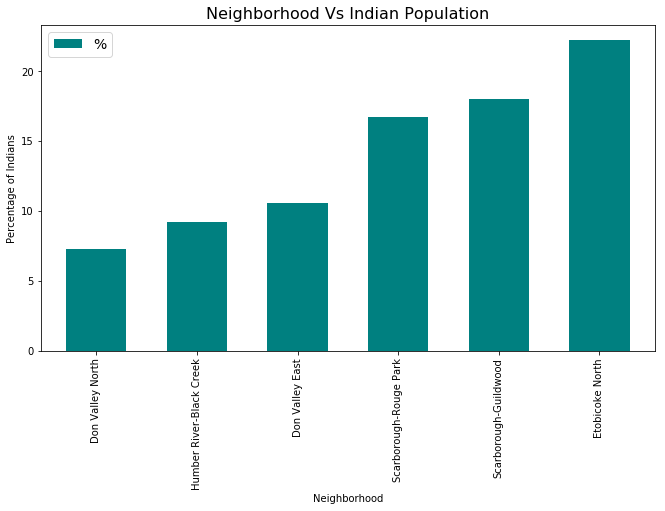

In [38]:
import matplotlib.pyplot as plt

ax = df_final.plot(kind='bar', 
                figsize=(11, 6),
                color = 'teal',
                width=.6,fontsize=10)
ax.set_title('Neighborhood Vs Indian Population',fontsize=16)
ax.legend(fontsize=14,facecolor = 'white') 
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Percentage of Indians')
plt.show()

In [39]:
print(total.shape)
total.head()

(39, 6)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.00000
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.02381
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.00000
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.00000
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.00000


# Clustering using k-means algorithm

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

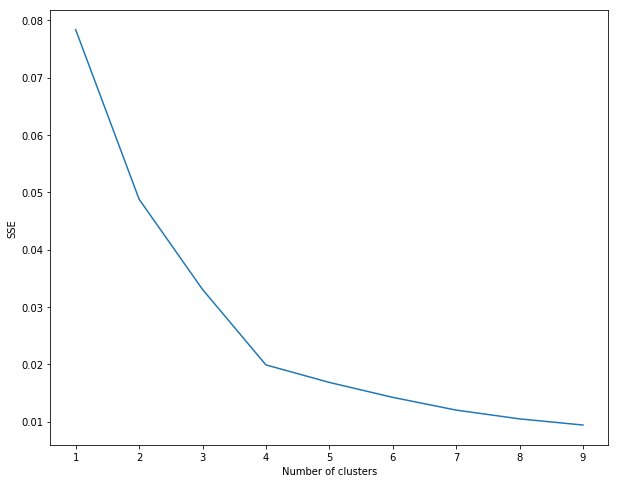

In [40]:
from sklearn.cluster import KMeans


data = total[['Indian Restaurant','Latitude','Longitude']]

sse={}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


In [42]:
!conda install -c districtdatalabs yellowbrick

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.1            |           py36_0         276 KB  districtdatalabs
    pytest-runner-5.2          |             py_0          13 KB
    ------------------------------------------------------------
                                           Total:         289 KB

The following NEW packages will be INSTALLED:

    pytest-runner:   5.2-py_0                                 
    yellowbrick:     1.1-py36_0               districtdatalabs

The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge      --> 2020.6.24-0     
    certifi:         2020.6.20-py36h9f0ad1d_0 conda-forge      --> 2020.6.20-py36_0


yellowbrick-1.1      | 276 KB    | ##############

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


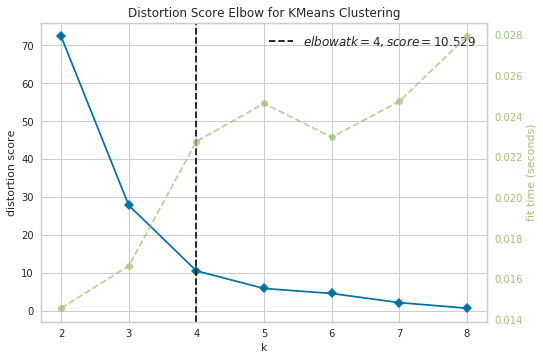

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(data)
visualizer.show()

In [44]:
kclusters=4

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data)
kmeans.labels_

array([0, 1, 0, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [45]:
data["Cluster Labels"] = kmeans.labels_
toronto_merged = total
toronto_merged = pd.merge(toronto_merged, data, on='Latitude')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PostalCode,Borough,Neighborhood,Latitude,Longitude_x,Indian Restaurant_x,Indian Restaurant_y,Longitude_y,clusters,Cluster Labels
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.00000,0.00000,-79.293031,2,0
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.02381,0.02381,-79.352188,7,1
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.00000,0.00000,-79.315572,2,0
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.00000,0.00000,-79.340923,2,0
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.00000,0.00000,-79.388790,1,3


In [46]:
toronto_merged.columns

Index(['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude_x',
       'Indian Restaurant_x', 'Indian Restaurant_y', 'Longitude_y', 'clusters',
       'Cluster Labels'],
      dtype='object')

In [47]:
toronto_merged.drop(['Indian Restaurant_y', 'Longitude_y', 'clusters'], axis=1, inplace=True)
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude_x,Indian Restaurant_x,Cluster Labels
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.000000,0
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.023810,1
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.000000,0
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.000000,0
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.000000,3
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0.000000,3
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.000000,1
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.030303,3
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000,0
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.000000,1


In [48]:
toronto_merged.rename(columns={'Longitude_x':'Longitude', 'Indian Restaurant_x':'Indian Restaurant'}, inplace=True)
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant,Cluster Labels
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.00000,0
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.02381,1
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.00000,0
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.00000,0
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.00000,3


In [49]:
Cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
Cluster_3

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant,Cluster Labels
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.000000,3
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0.000000,3
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.030303,3
13,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.000000,3
14,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.000000,3
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.000000,3
16,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.017544,3
18,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0.000000,3
19,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0.010000,3
20,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0.000000,3


In [50]:
Cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
Cluster_2

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant,Cluster Labels
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.045455,2
25,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0.000000,2
30,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.000000,2
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0.000000,2
32,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0.000000,2
33,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0.000000,2
34,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,0.000000,2
35,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,0.000000,2
36,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,0.000000,2


In [51]:
Cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
Cluster_1

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant,Cluster Labels
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.02381,1
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.00000,1
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.00000,1
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0.00000,1
23,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,0.00000,1


In [52]:
Cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
Cluster_0

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant,Cluster Labels
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.000000,0
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.000000,0
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.000000,0
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000,0
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0.000000,0
11,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,0.022727,0
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0.013333,0
17,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.015873,0
37,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.000000,0
38,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,0.000000,0


In [53]:
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=10)

for lat,lng,label in zip(Cluster_3['Latitude'], Cluster_3['Longitude'], Cluster_3['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
    
for lat,lng,label in zip(Cluster_2['Latitude'], Cluster_2['Longitude'], Cluster_2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
    
for lat,lng,label in zip(Cluster_1['Latitude'], Cluster_1['Longitude'], Cluster_1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
    
for lat,lng,label in zip(Cluster_0['Latitude'], Cluster_0['Longitude'], Cluster_0['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='yellow',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
    
map_clusters